# Description du Notebook

Ce notebook permet de faire une analyse complète pour évaluer le modèle NER qu'on a entrainé. 

Etapes :

- détection, comparaison et correction des entités identifiées, 
- analyse comparative entre les résultats extraits et ceux attendus. 
- graphiques pour visualiser les performances du modèle

In [24]:
import spacy
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from spacy.tokens import DocBin
from spacy import displacy
import ast
from random import shuffle
import numpy as np
from collections import Counter
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

print("Librairies importées")

Librairies importées


In [16]:
print("Chargement des modèles sm, md et lg qu'on a entrainé...")
sm_model = spacy.load("../../models/saved_models/sm/model-best")
md_model = spacy.load("../../models/saved_models/md/model-best")
lg_model = spacy.load("../../models/saved_models/lg/model-best")

nlp_models = {
    'SM': sm_model,
    'MD': md_model,
    'LG': lg_model
}
print("Tous les modèles sont bien chargés.")

Chargement des modèles sm, md et lg qu'on a entrainé...
Tous les modèles sont bien chargés.


In [17]:
print("Extraction des entités de départ et destination")
def extract_entities(doc):
    return [(ent.text, ent.label_) for ent in doc.ents]

test_texts = [
    "Je veux aller de Paris à Lyon demain.",
    "Réservez-moi un billet de train de Lille à Marseille.",
    "Je pars de Bordeaux et j'arrive à Toulouse en soirée.",
    "Voyage de Strasbourg à Nice avec une escale à Paris.",
    "Quel est le meilleur trajet pour aller de Grenoble à Lille ?",
    "Je voudrais aller de Nice à Marseille en voiture.",
    "Peux-tu me dire comment aller de Toulouse à Lyon ?",
    "Je prends le train de Lille à Nantes et je m'arrête à Tours.",
    "Planifiez un voyage de Rennes à Lyon avec une escale à Paris.",
    "Je vais de Lyon à Nice par avion.",
    "Nous avons besoin d'un itinéraire de Marseille à Montpellier en bus.",
    "Est-ce que quelqu'un peut m'aider à trouver un chemin de Dijon à Strasbourg ?",
    "Je dois me rendre de Bordeaux à Marseille pour le travail.",
    "Y a-t-il un vol direct de Nice à Toulouse demain matin ?",
    "Mon ami part de Lyon pour aller à Lille ce week-end.",
    "Je cherche un trajet de Paris à Montpellier en train à grande vitesse.",
    "Faisons un road trip de Lyon à Annecy en passant par Chambéry.",
    "Comment puis-je aller de Lille à Bordeaux sans changer de train ?",
    "Je prévois de conduire de Marseille à Nice cet été.",
    "Il y a une liaison de train de Lyon à Genève que je veux prendre.",
    "Peux-tu me conseiller sur le meilleur chemin de Rennes à Nantes ?",
    "J'ai réservé un vol de Toulouse à Londres pour la semaine prochaine.",
    "Nous devons partir de Lille pour rejoindre la ville de Rouen.",
    "Je souhaite voyager de Strasbourg à Mulhouse en voiture partagée.",
    "Mon itinéraire passe par Lyon avant d'arriver à Marseille.",
    "Y a-t-il des bus réguliers entre Grenoble et Lyon ?",
    "Je vais prendre le tram de Paris à Versailles ce week-end.",
    "Réserve un train de Nice à Lyon avec une escale à Marseille.",
    "Comment atteindre l'aéroport de Bordeaux depuis le centre-ville ?",
    "Je veux visiter Genève, alors je pars de Lyon pour quelques jours."
]

ground_truths = [
    [('Paris', 'DEPARTURE'), ('Lyon', 'DESTINATION')],
    [('Lille', 'DEPARTURE'), ('Marseille', 'DESTINATION')],
    [('Bordeaux', 'DEPARTURE'), ('Toulouse', 'DESTINATION')],
    [('Strasbourg', 'DEPARTURE'), ('Nice', 'DESTINATION'), ('Paris', 'STOP')],
    [('Grenoble', 'DEPARTURE'), ('Lille', 'DESTINATION')],
    [('Nice', 'DEPARTURE'), ('Marseille', 'DESTINATION')],
    [('Toulouse', 'DEPARTURE'), ('Lyon', 'DESTINATION')],
    [('Lille', 'DEPARTURE'), ('Nantes', 'DESTINATION'), ('Tours', 'STOP')],
    [('Rennes', 'DEPARTURE'), ('Lyon', 'DESTINATION'), ('Paris', 'STOP')],
    [('Lyon', 'DEPARTURE'), ('Nice', 'DESTINATION')],
    [('Marseille', 'DEPARTURE'), ('Montpellier', 'DESTINATION')],
    [('Dijon', 'DEPARTURE'), ('Strasbourg', 'DESTINATION')],
    [('Bordeaux', 'DEPARTURE'), ('Marseille', 'DESTINATION')],
    [('Nice', 'DEPARTURE'), ('Toulouse', 'DESTINATION')],
    [('Lyon', 'DEPARTURE'), ('Lille', 'DESTINATION')],
    [('Paris', 'DEPARTURE'), ('Montpellier', 'DESTINATION')],
    [('Lyon', 'DEPARTURE'), ('Annecy', 'DESTINATION'), ('Chambéry', 'STOP')],
    [('Lille', 'DEPARTURE'), ('Bordeaux', 'DESTINATION')],
    [('Marseille', 'DEPARTURE'), ('Nice', 'DESTINATION')],
    [('Lyon', 'DEPARTURE'), ('Genève', 'DESTINATION')],
    [('Rennes', 'DEPARTURE'), ('Nantes', 'DESTINATION')],
    [('Toulouse', 'DEPARTURE'), ('Londres', 'DESTINATION')],
    [('Lille', 'DEPARTURE'), ('Rouen', 'DESTINATION')],
    [('Strasbourg', 'DEPARTURE'), ('Mulhouse', 'DESTINATION')],
    [('Lyon', 'DEPARTURE'), ('Marseille', 'DESTINATION')],
    [('Grenoble', 'DEPARTURE'), ('Lyon', 'DESTINATION')],
    [('Paris', 'DEPARTURE'), ('Versailles', 'DESTINATION')],
    [('Nice', 'DEPARTURE'), ('Lyon', 'DESTINATION'), ('Marseille', 'STOP')],
    [('Bordeaux', 'DEPARTURE'), ('aéroport', 'DESTINATION')],
    [('Lyon', 'DEPARTURE'), ('Genève', 'DESTINATION')]
]

Extraction des entités de départ et destination


In [18]:
print("Evaluation de chaque modèle sur un ensemble de textes de test")
def evaluate_models(nlp_models, texts, ground_truths):
    results = {key: [] for key in nlp_models.keys()}
    for text in texts:
        for model_key, model in nlp_models.items():
            doc = model(text)
            entities = extract_entities(doc)
            results[model_key].append(entities)
    return results

results = evaluate_models(nlp_models, test_texts, ground_truths)
print("Modèle évalué")

Evaluation de chaque modèle sur un ensemble de textes de test
Modèle évalué


In [25]:
print("Comparaison des résultats extraits et des annotations de référence")
def compute_metrics(results, ground_truths):
    metrics = {key: {'precision': [], 'recall': [], 'f1_score': []} for key in results.keys()}
    
    # Calcul des métriques pour chaque modèle
    for model_key, model_results in results.items():
        for predicted, true in zip(model_results, ground_truths):
            true_set = set(true)
            pred_set = set(predicted)
            tp = len(true_set & pred_set)
            fp = len(pred_set - true_set)
            fn = len(true_set - pred_set)

            precision = tp / (tp + fp) if tp + fp > 0 else 0
            recall = tp / (tp + fn) if tp + fn > 0 else 0
            f1_score = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

            metrics[model_key]['precision'].append(precision)
            metrics[model_key]['recall'].append(recall)
            metrics[model_key]['f1_score'].append(f1_score)

    # Calcul des moyennes et des intervalles de confiance
    summary_data = []  # Liste pour stocker les résultats des résumés
    for model_key in metrics:
        for metric in metrics[model_key]:
            metric_scores = metrics[model_key][metric]
            mean_score = np.mean(metric_scores)
            std_error = np.std(metric_scores) / np.sqrt(len(metric_scores))
            confidence_interval = 1.96 * std_error  # Intervalle de confiance 95%
            summary_data.append({
                'Modèle': model_key,
                'Métrique': metric.capitalize(),
                'Moyenne': f"{mean_score:.2f}",
                'Intervalle de confiance (95%)': f"{mean_score - confidence_interval:.2f} à {mean_score + confidence_interval:.2f}"
            })

    # Créer un DataFrame à partir des résumés
    metrics_df = pd.DataFrame(summary_data)
    
    # Formatage du tableau pour une meilleure présentation
    metrics_df['Moyenne'] = metrics_df['Moyenne'].astype(float)
    metrics_df['Intervalle de confiance (95%)'] = metrics_df['Intervalle de confiance (95%)'].astype(str)

    # Afficher le DataFrame
    display(HTML(metrics_df.to_html(index=False, border=0, justify='center')))

    return metrics

# Exécuter le calcul des métriques et afficher les résultats
metrics = compute_metrics(results, ground_truths)

Comparaison des résultats extraits et des annotations de référence


Modèle,Métrique,Moyenne,Intervalle de confiance (95%)
SM,Precision,0.27,0.12 à 0.42
SM,Recall,0.17,0.07 à 0.26
SM,F1_score,0.20,0.09 à 0.31
MD,Precision,0.27,0.12 à 0.42
MD,Recall,0.17,0.07 à 0.26
MD,F1_score,0.20,0.09 à 0.31
LG,Precision,0.27,0.12 à 0.42
LG,Recall,0.17,0.07 à 0.26
LG,F1_score,0.20,0.09 à 0.31


Visualisation des métriques pour chaque modèle avec intervalles de confiance


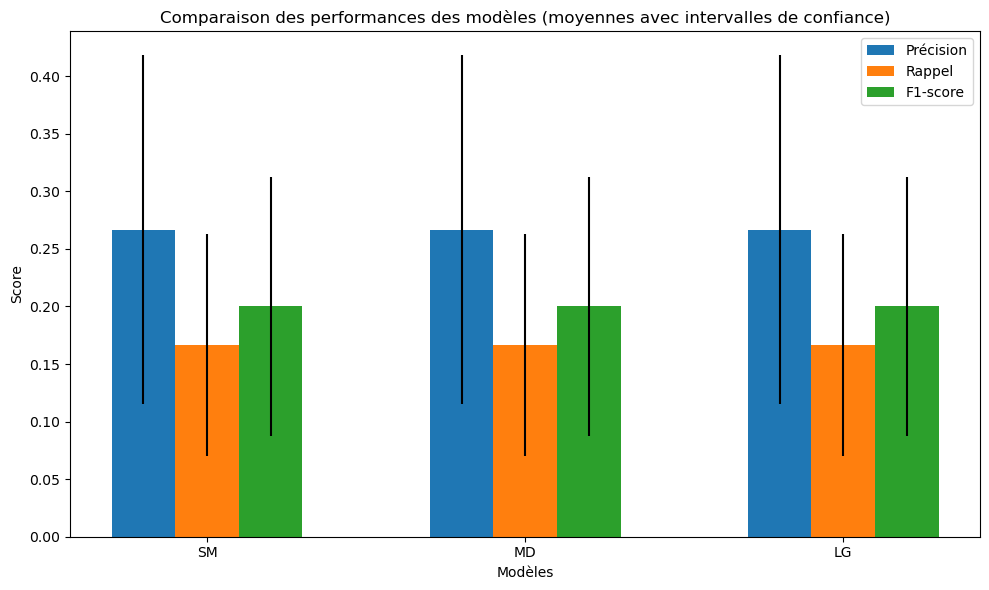

In [20]:
print("Visualisation des métriques pour chaque modèle avec intervalles de confiance")
def plot_metrics(metrics):
    model_names = list(metrics.keys())
    precision_means = [metrics[model]['precision']['mean'] for model in model_names]
    precision_cis = [metrics[model]['precision']['ci'] for model in model_names]
    recall_means = [metrics[model]['recall']['mean'] for model in model_names]
    recall_cis = [metrics[model]['recall']['ci'] for model in model_names]
    f1_means = [metrics[model]['f1_score']['mean'] for model in model_names]
    f1_cis = [metrics[model]['f1_score']['ci'] for model in model_names]

    x = range(len(model_names))

    plt.figure(figsize=(10, 6))
    plt.bar(x, precision_means, width=0.2, label='Précision', yerr=precision_cis, align='center')
    plt.bar([p + 0.2 for p in x], recall_means, width=0.2, label='Rappel', yerr=recall_cis, align='center')
    plt.bar([p + 0.4 for p in x], f1_means, width=0.2, label='F1-score', yerr=f1_cis, align='center')

    plt.xticks([p + 0.2 for p in x], model_names)
    plt.xlabel('Modèles')
    plt.ylabel('Score')
    plt.title('Comparaison des performances des modèles (moyennes avec intervalles de confiance)')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metrics(metrics)

In [21]:
print("Analyse des erreurs pour visualiser les entités mal classifiées")
def error_analysis(results, ground_truths):
    errors = {key: [] for key in results.keys()}
    for model_key, model_results in results.items():
        for predicted, true in zip(model_results, ground_truths):
            true_set = set(true)
            pred_set = set(predicted)
            errors[model_key].append({
                'false_positive': list(pred_set - true_set),
                'false_negative': list(true_set - pred_set)
            })
    
    # Création d'un DataFrame pour chaque modèle
    error_tables = {}
    for model_key, error_list in errors.items():
        false_positive_counts = Counter()
        false_negative_counts = Counter()
        for error in error_list:
            false_positive_counts.update([ent for ent, _ in error['false_positive']])
            false_negative_counts.update([ent for ent, _ in error['false_negative']])
        
        # Créer un DataFrame pour les faux positifs et négatifs
        df_fp = pd.DataFrame(false_positive_counts.items(), columns=['Entity', 'False Positive Count'])
        df_fn = pd.DataFrame(false_negative_counts.items(), columns=['Entity', 'False Negative Count'])
        
        # Joindre les deux DataFrames sur l'entité
        df = pd.merge(df_fp, df_fn, on='Entity', how='outer').fillna(0)
        df['Model'] = model_key
        error_tables[model_key] = df

    # Affichage de chaque tableau pour les modèles
    for model_key, df in error_tables.items():
        print(f"\nAnalyse des erreurs pour le modèle : {model_key}")
        display(df)

    return errors

# Exécuter l'analyse des erreurs et afficher les résultats
errors = error_analysis(results, ground_truths)

Analyse des erreurs pour visualiser les entités mal classifiées

Analyse des erreurs pour le modèle : SM


,Entity,False Positive Count,False Negative Count,Model
0,Réservez,1.0,0.0,SM
1,.,8.0,0.0,SM
2,voiture,1.0,0.0,SM
3,Planifiez,1.0,0.0,SM
4,par,1.0,0.0,SM
5,de,1.0,0.0,SM
6,vitesse,1.0,0.0,SM
7,Rouen,1.0,1.0,SM
8,partagée,1.0,0.0,SM
9,jours,1.0,0.0,SM



Analyse des erreurs pour le modèle : MD


,Entity,False Positive Count,False Negative Count,Model
0,Réservez,1.0,0.0,MD
1,.,8.0,0.0,MD
2,voiture,1.0,0.0,MD
3,Planifiez,1.0,0.0,MD
4,par,1.0,0.0,MD
5,de,1.0,0.0,MD
6,vitesse,1.0,0.0,MD
7,Rouen,1.0,1.0,MD
8,partagée,1.0,0.0,MD
9,jours,1.0,0.0,MD



Analyse des erreurs pour le modèle : LG


,Entity,False Positive Count,False Negative Count,Model
0,Réservez,1.0,0.0,LG
1,.,8.0,0.0,LG
2,voiture,1.0,0.0,LG
3,Planifiez,1.0,0.0,LG
4,par,1.0,0.0,LG
5,de,1.0,0.0,LG
6,vitesse,1.0,0.0,LG
7,Rouen,1.0,1.0,LG
8,partagée,1.0,0.0,LG
9,jours,1.0,0.0,LG


Visualisation des erreurs courantes


C:\Users\vikne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\vikne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


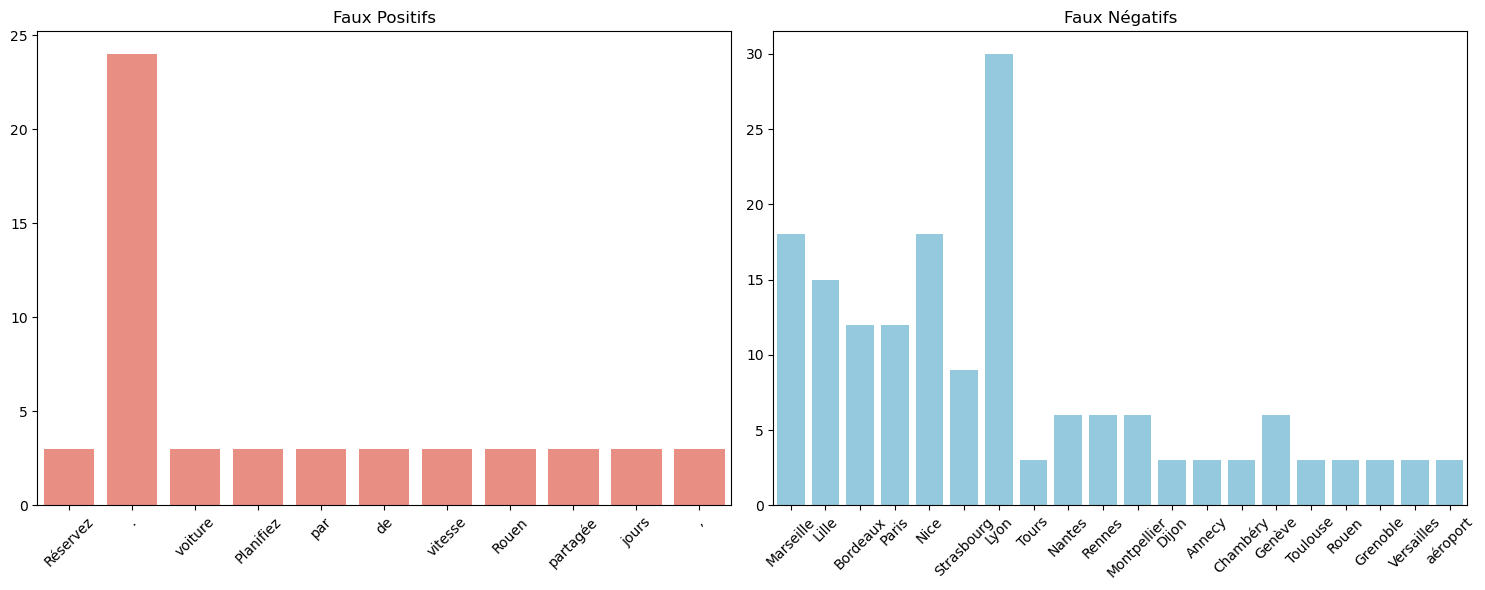

In [22]:
print("Visualisation des erreurs courantes")
def plot_errors(errors):
    error_counts = {'false_positive': Counter(), 'false_negative': Counter()}
    for model_key in errors:
        for error in errors[model_key]:
            error_counts['false_positive'].update([ent for ent, _ in error['false_positive']])
            error_counts['false_negative'].update([ent for ent, _ in error['false_negative']])

    # Graphique des erreurs fausses positives et fausses négatives
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    sns.barplot(x=list(error_counts['false_positive'].keys()), y=list(error_counts['false_positive'].values()), ax=ax[0], color="salmon")
    ax[0].set_title("Faux Positifs")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

    sns.barplot(x=list(error_counts['false_negative'].keys()), y=list(error_counts['false_negative'].values()), ax=ax[1], color="skyblue")
    ax[1].set_title("Faux Négatifs")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

plot_errors(errors)